# Detecting Vehicles

Here we are trying to create a model to detect 10 types of vehicles.

This is a dataset Arunoda created based on Google search images.
You can get it from [here](https://github.com/arunoda/fastai-courses/releases/tag/fastai-vehicles-dataset).

In [1]:
from fastai2.vision.all import *

## Getting Data

Here we will download a dataset hosted on GitHub.<br/>
Unfortunately, `untar_data` does not work with here. So, use the following `download.sh` bash script.

In [2]:
dataset_url = "https://github.com/arunoda/fastai-courses/releases/download/fastai-vehicles-dataset/fastai-vehicles.tgz"

In [3]:
!./download.sh {dataset_url}

> Downloding dataset
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   632  100   632    0     0   2524      0 --:--:-- --:--:-- --:--:--  2517
100 32.7M  100 32.7M    0     0  35.7M      0 --:--:-- --:--:-- --:--:-- 35.7M

> Extracting dataset

> Dataset ready at the following location
/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93


In [14]:
im_path = Path("/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93")
im_path.ls()

(#1) [Path('/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images')]

In [16]:
image_list = (im_path/"images").ls()
image_list

(#1169) [Path('/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images/audi-a3-0.jpg'),Path('/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images/jeep-wrangler-38.jpg'),Path('/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images/audi-a3-120.jpg'),Path('/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images/honda-crv-60.jpg'),Path('/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images/suzuki-swift-39.jpg'),Path('/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images/honda-fit-72.jpg'),Path('/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images/jeep-wrangler-27.jpg'),Path('/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images/defender-25.jpg'),Path('/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images/audi-a3-38.jpg'),Path('/storage/deeplearning/.datasets/77c6

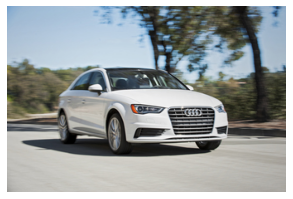

In [21]:
print
show_image(Image.open(image_list[0]))

## Let's load Images

In [23]:
def get_vehicle_type(p):
    return re.sub('-[0-9]+.*', '', p.name)

get_vehicle_type(image_list[0])

'audi-a3'

In [24]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.3),
    get_y=get_vehicle_type,
    item_tfms=Resize(224)
)

In [25]:
dls = db.dataloaders(im_path/"images")

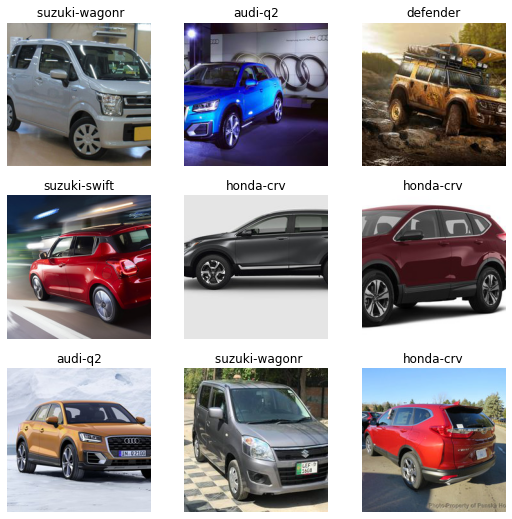

In [26]:
dls.show_batch()

In [27]:
## These are the types of vehicles we have.
dls.vocab

(#10) [' suzuki-wagonr','audi-a3','audi-q2','defender','honda-civic','honda-crv','honda-fit','jeep-wrangler','rangerover','suzuki-swift']

## Let's Create Our Model

In [28]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [29]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,3.022086,1.353761,0.522857,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.431949,0.857878,0.702857,00:05
1,1.007065,0.599563,0.805714,00:04
2,0.701553,0.534259,0.831429,00:04
3,0.520979,0.524355,0.834286,00:04


## Let's Analyze Our Model

In [30]:
analyzer = ClassificationInterpretation.from_learner(learn)

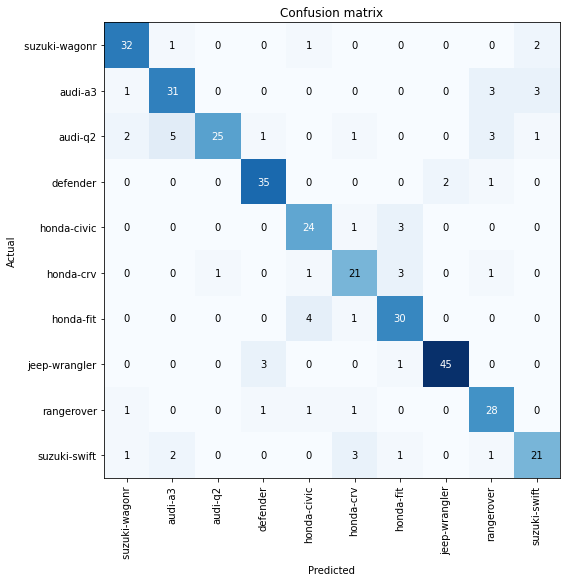

In [36]:
analyzer.plot_confusion_matrix(figsize=(8,8))

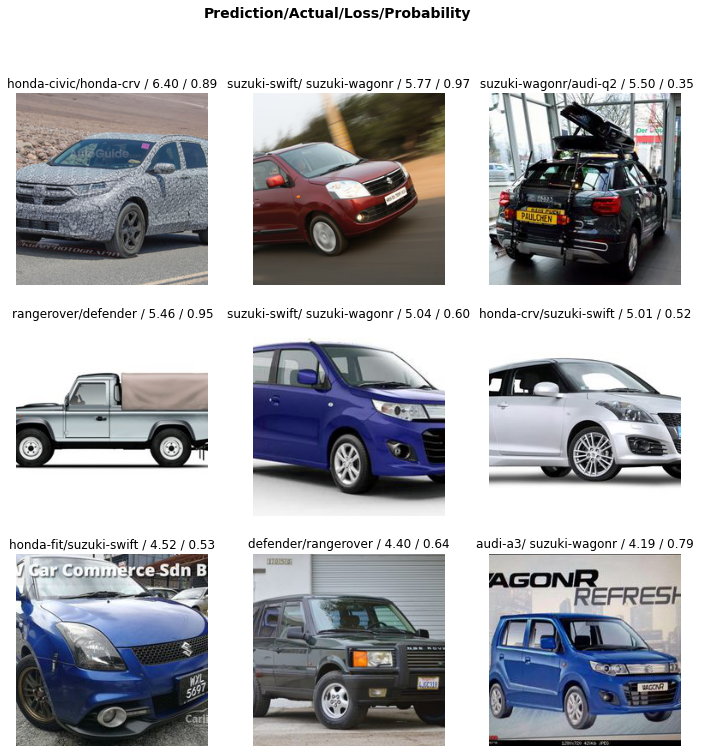

In [37]:
analyzer.plot_top_losses(9, figsize=(12, 12))

## Cleaning Data

In [38]:
from utils import *
from fastai2.vision.widgets import *

In [39]:
cleaner = ImageClassifierCleaner(learn)

In [40]:
cleaner

In [41]:
for idx in cleaner.delete():
    print(cleaner.fns[idx])
    cleaner.fns[idx].unlink()

/storage/deeplearning/.datasets/77c6f8768e1dcbe1935d260cedfad9329e025c93/images/honda-fit-16.jpg


## Run the model again

In [42]:
dls = db.dataloaders(im_path)

In [43]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [44]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.932787,1.394263,0.474286,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.388131,0.838226,0.685714,00:06
1,1.001643,0.548883,0.840000,00:06
2,0.708665,0.456805,0.860000,00:06
3,0.527983,0.447444,0.851429,00:06
